In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
import numpy as np
import pycodamath as coda

/var/folders/7_/0hhqk3r108sg_425jwnnfv1h0000gn/T/ipykernel_33922/4207243977.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


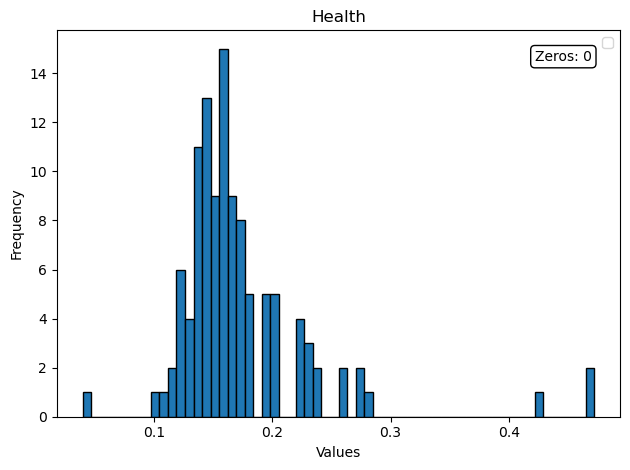

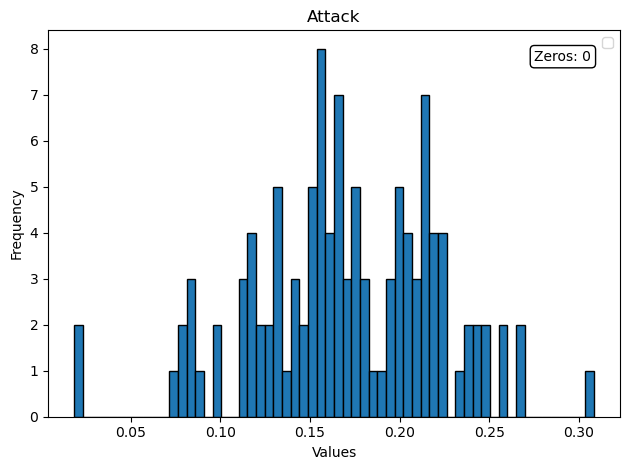

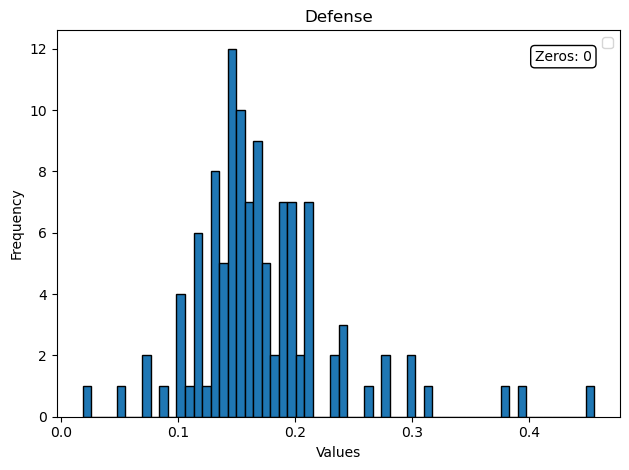

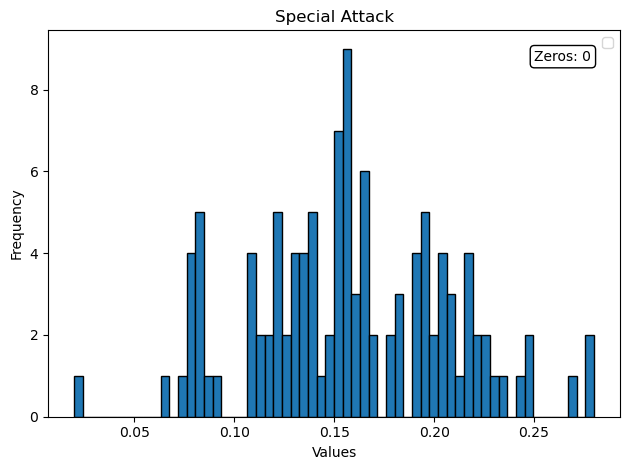

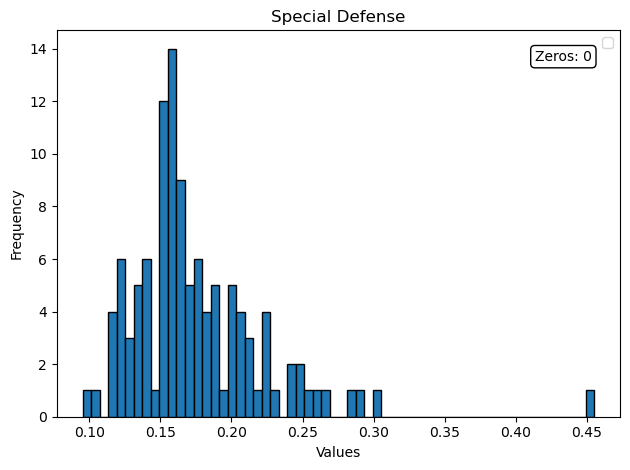

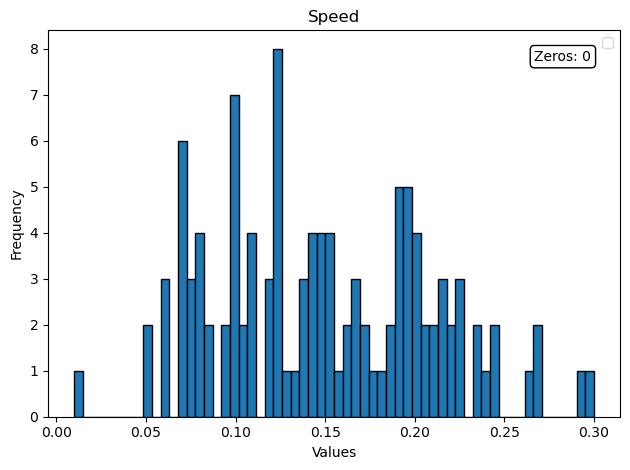

In [8]:
df = pd.read_csv("6-Pokemon_gen2.csv", index_col=0)

# Select numeric columns starting from the 5th one (index 4)
numeric_cols = df.select_dtypes(include=["number"]).columns

# Compute row-wise sum only from those columns
row_sums = df[numeric_cols].sum(axis=1)

for column in numeric_cols:
    data = df[column].div(row_sums, axis=0)
    
    plt.hist(data.dropna(), bins=60, stacked=True, edgecolor='black')

    num_zeros = (data == 0).sum()
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.title(column)
    plt.legend()

    # Text box with number of zeros
    plt.text(0.95, 0.95, f'Zeros: {num_zeros}', transform=plt.gca().transAxes,
             fontsize=10, verticalalignment='top', horizontalalignment='right',
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

    plt.tight_layout()
    plt.show()



Exercise 6.1
[17.57249633 17.00422653 17.1010676  15.89143243 18.05626169 14.37451541]
[[0.         0.27852937 0.31067996 0.2017722  0.18579629 0.33601205]
 [0.27852937 0.         0.2387815  0.26864325 0.35805732 0.3255996 ]
 [0.31067996 0.2387815  0.         0.42021856 0.20811882 0.57012916]
 [0.2017722  0.26864325 0.42021856 0.         0.22732118 0.29036288]
 [0.18579629 0.35805732 0.20811882 0.22732118 0.         0.35435215]
 [0.33601205 0.3255996  0.57012916 0.29036288 0.35435215 0.        ]]
1.5247914254895965

Exercise 6.2
       Health    Attack   Defense  Special Attack  Special Defense     Speed
206  2.560820  2.881637  3.800932        3.083422         3.599859  3.130540
207  3.414427  3.646152  4.678071        3.964400         4.430596  4.174054
208  4.552569  4.822330  5.847588        5.222940         5.538245  5.565405
209  2.219377  3.058063  2.514463        3.775619         2.769122  4.521892
210  3.300612  3.763770  3.391601        5.034159         3.599859  5.565405
..

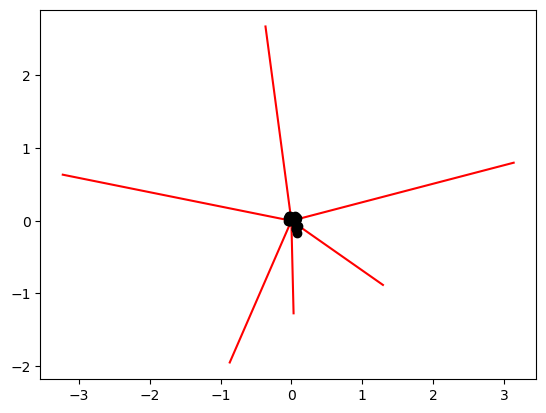

In [17]:
#NO zeroes :)

data = df.select_dtypes(include=["number"])


print('\nExercise 6.1')

# Geometric center
gm = ss.mstats.gmean(data)
gm = 100/np.sum(gm) * gm
print(gm)
# [36.89924841850101, 36.44274286865587, 26.658008712843113]

# Variation matrix
npdata = np.array(data)
var_matrix = np.var(np.log(npdata[:, :, None] * 1./npdata[:, None]), axis=0)
print(var_matrix)
#   0.      1.904       1.209
#   1.904   0.          1.381
#   1.209   1.381       0

# Total variation
totvar = 1./(2 * 3) * np.sum(var_matrix)
print(totvar)
# 1.498


print('\nExercise 6.2')

# Perturb by inverse Gm
pert_data = data/gm
print(pert_data)
# Geometric mean: [ 33.33, 33.33, 33.33]
# var_matrix : same as above
# totvar : same as above

scaled_data = pow(data, 1./np.sqrt(totvar))
print(scaled_data)

print('\nExercise 6.3')
clr = pow(data/gm, 1./np.sqrt(totvar)).coda.clr()
s, e, l = np.linalg.svd(clr)
# scale loadings with eigenvalues
l = np.inner(e*np.identity(6), l.T[0:6, 0:6])

# plot
[plt.plot([0, l[0][i]], [0,l[1][i]], color='red') for i in range(6)]
[plt.plot([s.T[0][i]], [s.T[1][i]], 'o', color='black') for i in range(20)]

plt.show()



/var/folders/7_/0hhqk3r108sg_425jwnnfv1h0000gn/T/ipykernel_33922/1527631337.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab20', len(unique_types))


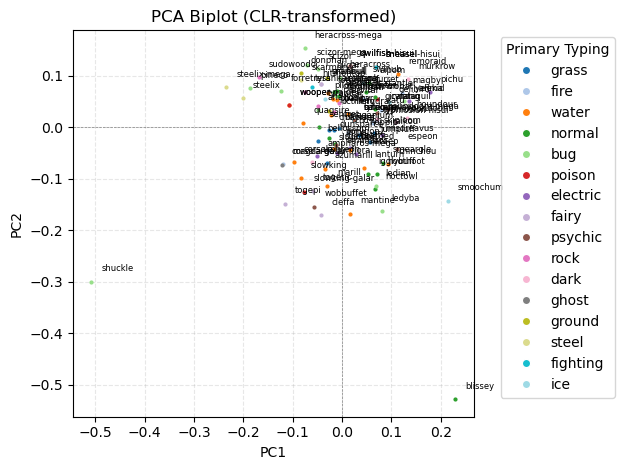

In [29]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# CLR transform and SVD
clr = pow(data / gm, 1. / np.sqrt(totvar)).coda.clr()
s, e, l = np.linalg.svd(clr)
l = np.inner(e * np.identity(6), l.T[0:6, 0:6])

# Unique types and color mapping
types = df['Primary Typing']
names = df['Name']
unique_types = types.unique()
cmap = cm.get_cmap('tab20', len(unique_types))
type_colors = {t: cmap(i) for i, t in enumerate(unique_types)}

# Plot loadings (black arrows)
# for i in range(6):
#     plt.arrow(0, 0, l[0][i], l[1][i],
#               color='black', width=0.005, head_width=0.05, length_includes_head=True)    
#     plt.text(l[0][i]*1.1, l[1][i]*1.1, data.columns[i], color='black', fontsize=9)

# Plot sample points colored by type
for i in range(s.shape[1]):
    type_label = types.iloc[i]
    color = type_colors.get(type_label, 'gray')
    plt.plot(s.T[0][i], s.T[1][i], 'o', color=color, ms=2)
    plt.text(s.T[0][i]+0.02, s.T[1][i]+0.02, names.iloc[i], color='black', fontsize=6)

# Add legend
handles = [plt.Line2D([0], [0], marker='o', color='w', label=t,
                      markerfacecolor=type_colors[t], markersize=6)
           for t in unique_types]
plt.legend(handles=handles, title="Primary Typing", bbox_to_anchor=(1.05, 1), loc='upper left')

# Final plot setup
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Biplot (CLR-transformed)")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


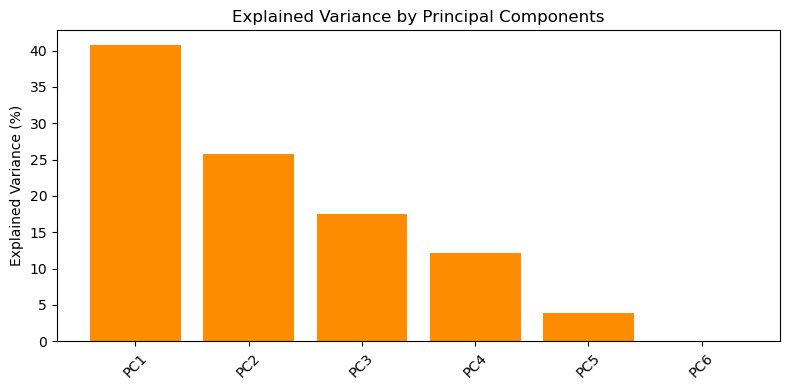

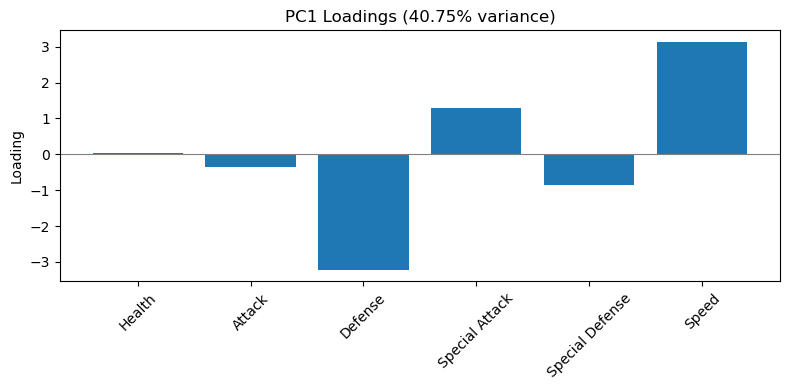

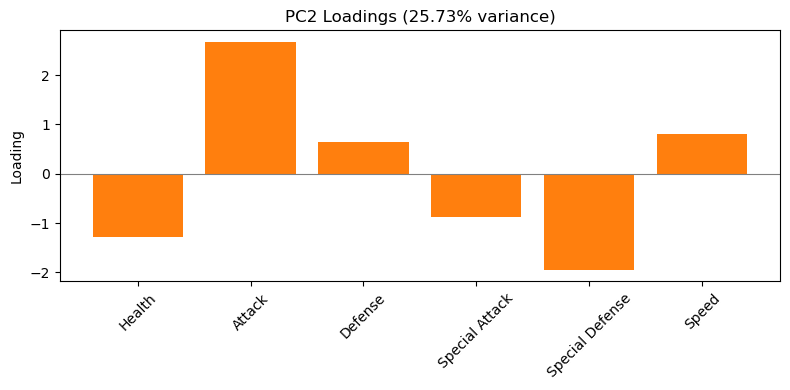

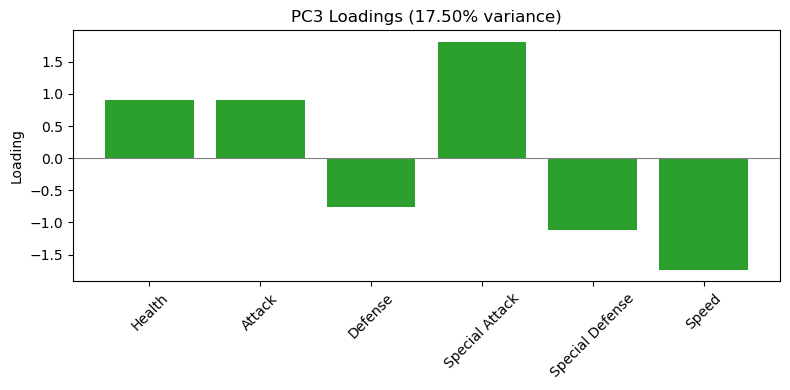

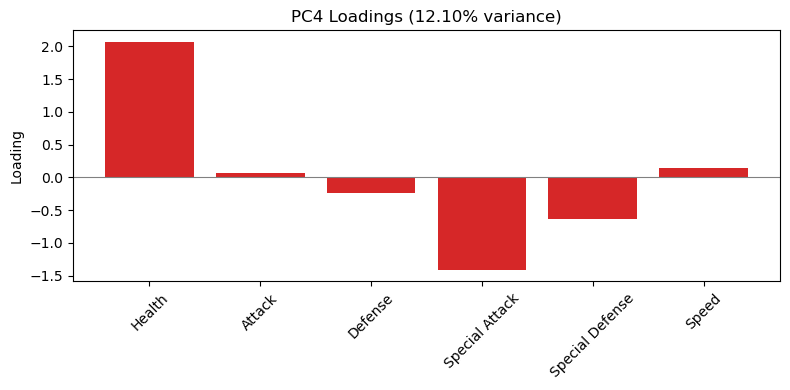

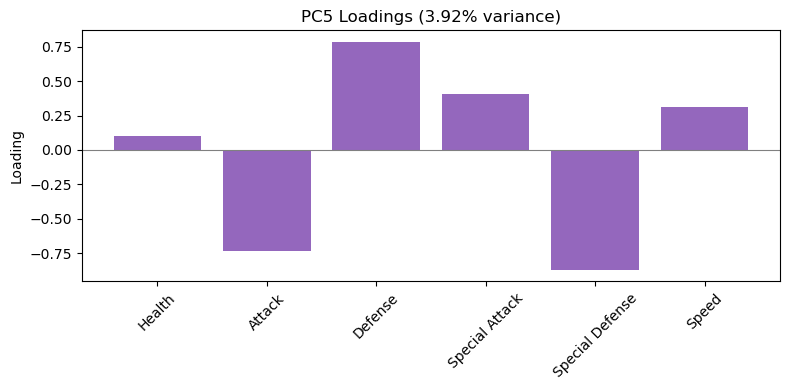

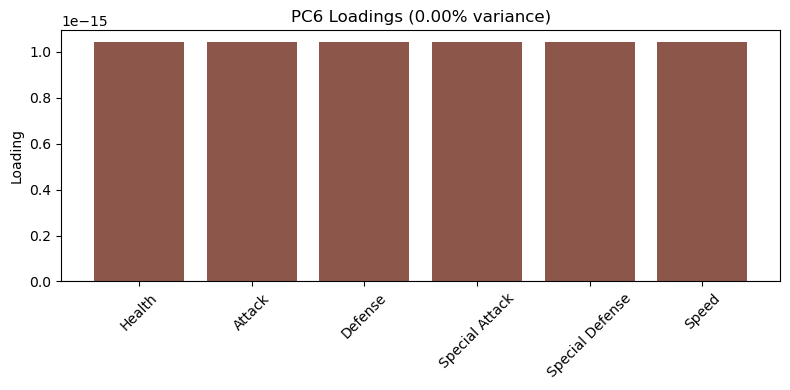

In [32]:
# Variance explained by each principal component
explained_variance = (e ** 2) / np.sum(e ** 2)  # Normalize to sum to 1
explained_variance_percent = explained_variance * 100

# Plot variance explained
plt.figure(figsize=(8, 4))
plt.bar([f'PC{i+1}' for i in range(len(e))], explained_variance_percent, color='darkorange')
plt.ylabel('Explained Variance (%)')
plt.title('Explained Variance by Principal Components')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot loadings for all PCs
num_pcs = l.shape[0]
for i in range(num_pcs):
    plt.figure(figsize=(8, 4))
    plt.bar(data.columns, l[i], color=plt.cm.tab10(i % 10))
    plt.axhline(0, color='gray', linewidth=0.8)
    plt.ylabel('Loading')
    plt.title(f'PC{i+1} Loadings ({explained_variance_percent[i]:.2f}% variance)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
